### Intervalos de Confiança em Machine Learning

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
dataset = pd.read_csv('datasets/credit_data.csv')
dataset.dropna(inplace=True)
dataset.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [2]:
# Atributos preditores
X = dataset.iloc[:, 1:4].values
X

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [3]:
# Atributo alvo
y = dataset.iloc[:, 4].values
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [4]:
# 300 é o valor correspondente  aos 30 testes realizando, cada um seperando a base em 10 partes (30 * 10 = 300)
# Usa-se 30 e 10 para esses parâmetros por serem valores aceitos no meio científico 
# por serem utilizados nos experimentos de publicações

resultados_naive_bayes_cv = []
resultados_naive_bayes_cv_300 = []
resultados_logistica_cv = []
resultados_logistica_cv_300 = []
resultados_forest_cv = []
resultados_forest_cv_300 = []
for i in range(30):
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)

    naive_bayes = GaussianNB()
    scores = cross_val_score(naive_bayes, X, y, cv = kfold)
    resultados_naive_bayes_cv_300.append(scores)
    resultados_naive_bayes_cv.append(scores.mean())

    logistica = LogisticRegression()
    scores = cross_val_score(logistica, X, y, cv = kfold)
    resultados_logistica_cv_300.append(scores)
    resultados_logistica_cv.append(scores.mean())

    random_forest = RandomForestClassifier()
    scores = cross_val_score(random_forest, X, y, cv = kfold)
    resultados_forest_cv_300.append(scores)
    resultados_forest_cv.append(scores.mean())

In [8]:
# Tamanho das listas
len(resultados_naive_bayes_cv), len(resultados_naive_bayes_cv_300)

(30, 30)

In [7]:
np.asarray(resultados_naive_bayes_cv_300).shape

(30, 10)

In [9]:
# Convertendo redimensionando as listas
resultados_naive_bayes_cv = np.array(resultados_naive_bayes_cv)
resultados_naive_bayes_cv_300 = np.array(np.asarray(resultados_naive_bayes_cv_300).reshape(-1))
resultados_logistica_cv = np.array(resultados_logistica_cv)
resultados_logistica_cv_300 = np.array(np.asarray(resultados_logistica_cv_300).reshape(-1))
resultados_forest_cv = np.array(resultados_forest_cv)
resultados_forest_cv_300 = np.array(np.asarray(resultados_forest_cv_300).reshape(-1))

In [10]:
resultados_naive_bayes_cv_300.shape

(300,)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


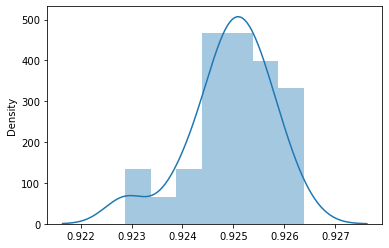

In [13]:
sns.distplot(resultados_naive_bayes_cv);

> Este plot com 30 amostras não apresenta uma distribuição normal

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

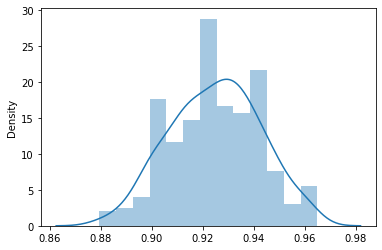

In [14]:
sns.distplot(resultados_naive_bayes_cv_300)

> Porém, quando aumenta a quantidade de amostras de 30 para 300, é possível identificar que a distribuição se aproxima de uma normal (Teorema do limite central).

> Desta forma é possível aplicar os cálculo de intervalo de confiança e outras estatísticas.

> É possível transformar dados em um distribuição normal aplicando a função Log.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


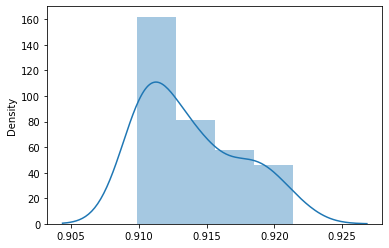

In [15]:
sns.distplot(resultados_logistica_cv);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


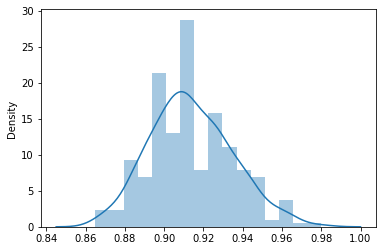

In [16]:
sns.distplot(resultados_logistica_cv_300);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


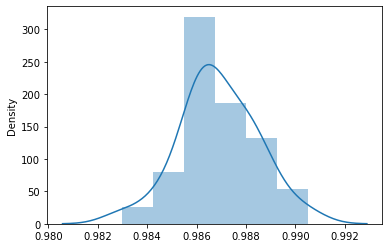

In [17]:
sns.distplot(resultados_forest_cv);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


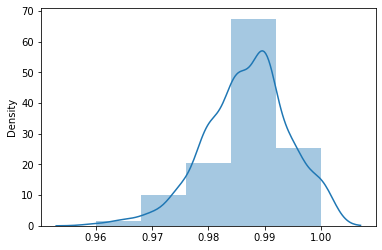

In [18]:
sns.distplot(resultados_forest_cv_300, bins=5);

In [19]:
# Calculo das médias
resultados_naive_bayes_cv.mean(), resultados_logistica_cv.mean(), resultados_forest_cv.mean()

(0.9249359296482411, 0.9137817420435511, 0.9868808207705193)

In [23]:
stats.variation(resultados_naive_bayes_cv) * 100, stats.variation(resultados_logistica_cv) * 100, stats.variation(resultados_forest_cv) * 100

(0.08641071566366061, 0.38801026116292653, 0.15752056613033028)

### Intervalos de confiança

In [24]:
from scipy.stats import t
from scipy.stats import norm

#### Naïve bayes

In [26]:
# 30 amostras
intervalos_naive_bayes_t = t.interval(0.95, len(resultados_naive_bayes_cv) - 1, 
                                    resultados_naive_bayes_cv.mean(), 
                                    stats.sem(resultados_naive_bayes_cv, ddof = 0))
print('Intervalo: ',intervalos_naive_bayes_t)

Intervalo:  (0.9246374871248957, 0.9252343721715865)


In [27]:
# Margem
abs(resultados_naive_bayes_cv.mean() - intervalos_naive_bayes_t[1])

0.0002984425233454324

In [29]:
# 300 amostras
intervalos_naive_bayes_n = norm.interval(0.95, resultados_naive_bayes_cv_300.mean(), 
                                         stats.sem(resultados_naive_bayes_cv_300))
print('Intervalo: ',intervalos_naive_bayes_n)

Intervalo:  (0.9229333893644709, 0.9269384699320113)


In [31]:
# Margem
abs(resultados_naive_bayes_cv_300.mean() - intervalos_naive_bayes_n[1])

0.0020025402837702266

> A margem é MAIOR com 300 amostras devido os dados serem mais consistentes comparado com 30 amostras.

### Regressão logística

In [32]:
# 30 amostras
intervalos_logistica_t = t.interval(0.95, len(resultados_logistica_cv) - 1, 
                                    resultados_logistica_cv.mean(), 
                                    stats.sem(resultados_logistica_cv, ddof = 0))
intervalos_logistica_t

(0.9124578055959317, 0.9151056784911705)

In [33]:
# Margem
abs(resultados_logistica_cv.mean() - intervalos_logistica_t[1])

0.0013239364476194115

In [35]:
# 300 amostras
intervalos_logistica_n = norm.interval(0.95, resultados_logistica_cv_300.mean(), 
                                       stats.sem(resultados_logistica_cv_300))
intervalos_logistica_n

(0.9114192660020396, 0.9161442180850629)

In [36]:
# Margem
abs(resultados_logistica_cv_300.mean() - intervalos_logistica_n[1])

0.0023624760415116297

### Random Forest

In [37]:
intervalos_forest_t = t.interval(0.95, len(resultados_forest_cv) - 1, 
                                 resultados_forest_cv.mean(), 
                                 stats.sem(resultados_forest_cv, ddof = 0))
intervalos_forest_t

(0.9863003458991252, 0.9874612956419134)

In [38]:
abs(resultados_forest_cv.mean() - intervalos_forest_t[1])

0.000580474871394121

In [39]:
intervalos_forest_n = norm.interval(0.95, resultados_forest_cv_300.mean(), 
                                    stats.sem(resultados_forest_cv_300))
intervalos_forest_n

(0.9860437771041201, 0.9877178644369188)

In [40]:
abs(resultados_forest_cv_300.mean() - intervalos_forest_n[1])

0.0008370436663993619

> Temos 95% de confiança de que a média de acertos do Random Forest está no intervalo entre 98,63% e 98,74% - 98,59% e 98,77%

In [43]:
kfold = KFold(n_splits = 10, shuffle = True)
random_forest = RandomForestClassifier()
scores = cross_val_score(random_forest, X, y, cv = kfold)
print(scores.mean())

0.9889798994974874
